<a href="https://colab.research.google.com/github/gemdata0/Tanzania-Tourism-Prediction-/blob/main/Tanzania_Tourism_Expenditure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://zindi.africa/competitions/tanzania-tourism-prediction/data

#**Summary**

The dataset describes 6476 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Tanzania.The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth.

The goal is to **accurately predict tourist expenditure when visiting Tanzania.**

The majority of the visitors under the age group of 25-44 came for business (18.5%), or leisure and holidays (53.2%), which is consistent with the fact that they are economically more productive. Those at the age group of 45-64 were more prominent in holiday making and visiting friends and relatives. The results further reveal that most visitors belonging to the age group of 18-24 came for leisure and holidays (55.3%) as well as volunteering (13.7%). The majority of senior citizens (65 and above) came for leisure and holidays (80.9%) and visiting friends and relatives (9.5%).

The survey covers seven departure points, namely: Julius Nyerere International Airport, Kilimanjaro International Airport, Abeid Amani Karume International Airport, and the Namanga, Tunduma, Mtukula and Manyovu border points.

#**Loading and Viewing the data**

**importing libraries**

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

**loading and viewing the data**

In [ ]:
data = pd.read_csv('Train.csv')
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


**further information on the data**

In [ ]:
data.info()

# 23 columns and 4809 rows
# data is in objects and floats only
# there are missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

**statistical description**

In [ ]:
data.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


#**Data Cleaning**

**checking for null values**

In [ ]:
data.isnull().sum()
# There are several missing values

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

**dealing with missing values**

In [ ]:
# Replacing 'travel_with' missing values with 'others'
# Replacing 'most_impressing' missing values with 'no comments'
data['travel_with'] = data['travel_with'].replace(np.NaN, 'other') 
data['most_impressing'] = data['most_impressing'].replace(np.NaN, 'No comments')

# Dropping missing values in the 'total_female' and 'total_male' columns.
data = data.dropna()

# Replacing the missing values with the mode value in the 'total_female' and 'total_male' columns.
data['total_female'].replace([np.nan], data['total_female'].mode()[0], inplace=True)
data['total_male'].replace([np.nan], data['total_male'].mode()[0], inplace=True)

# Confirming there are no missing values 
data.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

**checking for duplicated values**

In [ ]:
data.duplicated().sum()
# There are no duplicated values in the data.

0

**checking for outliers**

In [ ]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
outliers = data[((data < (q1 - 1.5*iqr))|(data > (q3 + 1.5*iqr)))]
outliers.count()

ID                          0
country                     0
age_group                   0
travel_with                 0
total_female              253
total_male               1842
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland            274
night_zanzibar            186
payment_mode                0
first_trip_tz               0
most_impressing             0
total_cost                422
dtype: int64

**visualizing the outliers**

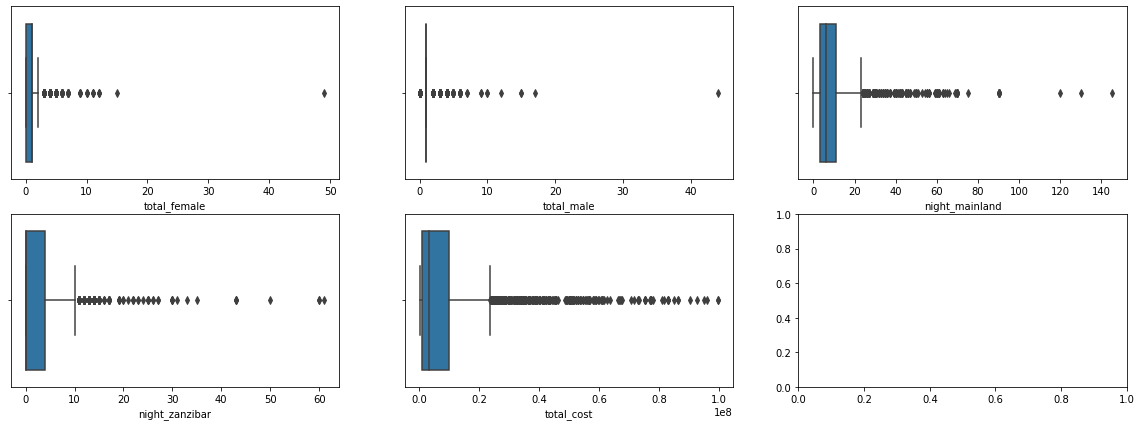

In [ ]:
types = data[['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost']]
fig, axes = plt.subplots(2,3, figsize = (20,7))
for cols, ax in zip(types, axes.flatten()):
  sns.boxplot(data[cols], ax = ax);

# We will not be dropping or acting on the outliers as they are a true representation of the data.

#**Uni-Variate Analysis**

**target column**

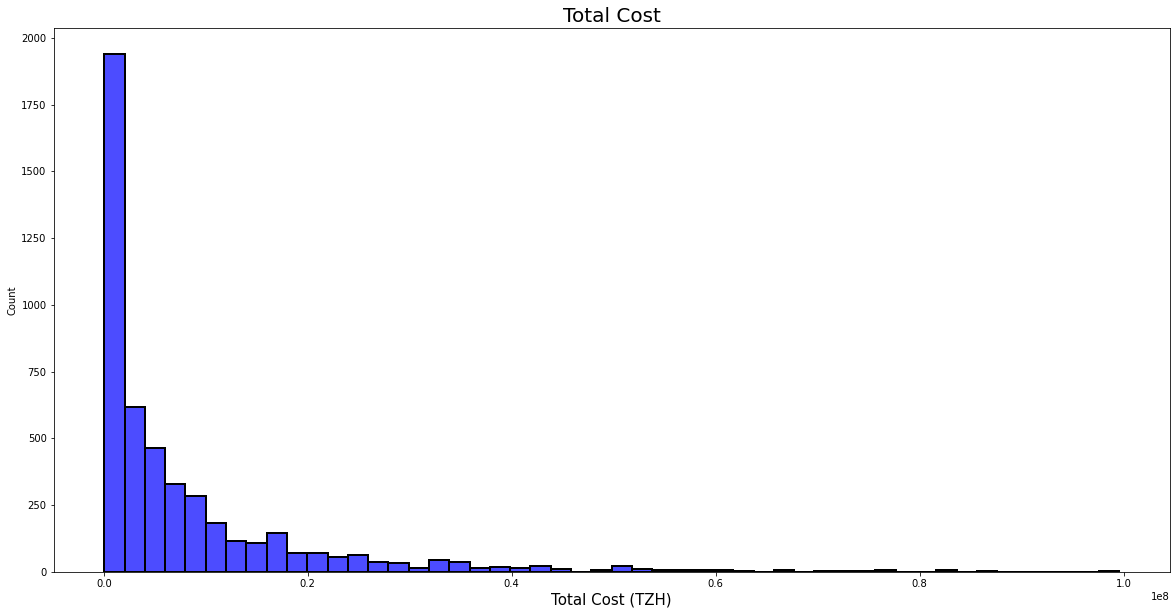

In [ ]:
fig, axes = plt.subplots(figsize = (20,10))
sns.histplot(data['total_cost'], bins = 50, linewidth = 2, edgecolor = 'black', color = 'blue', alpha = 0.7)
plt.title('Total Cost', size = 20)
plt.xlabel('Total Cost (TZH)', size = 15);

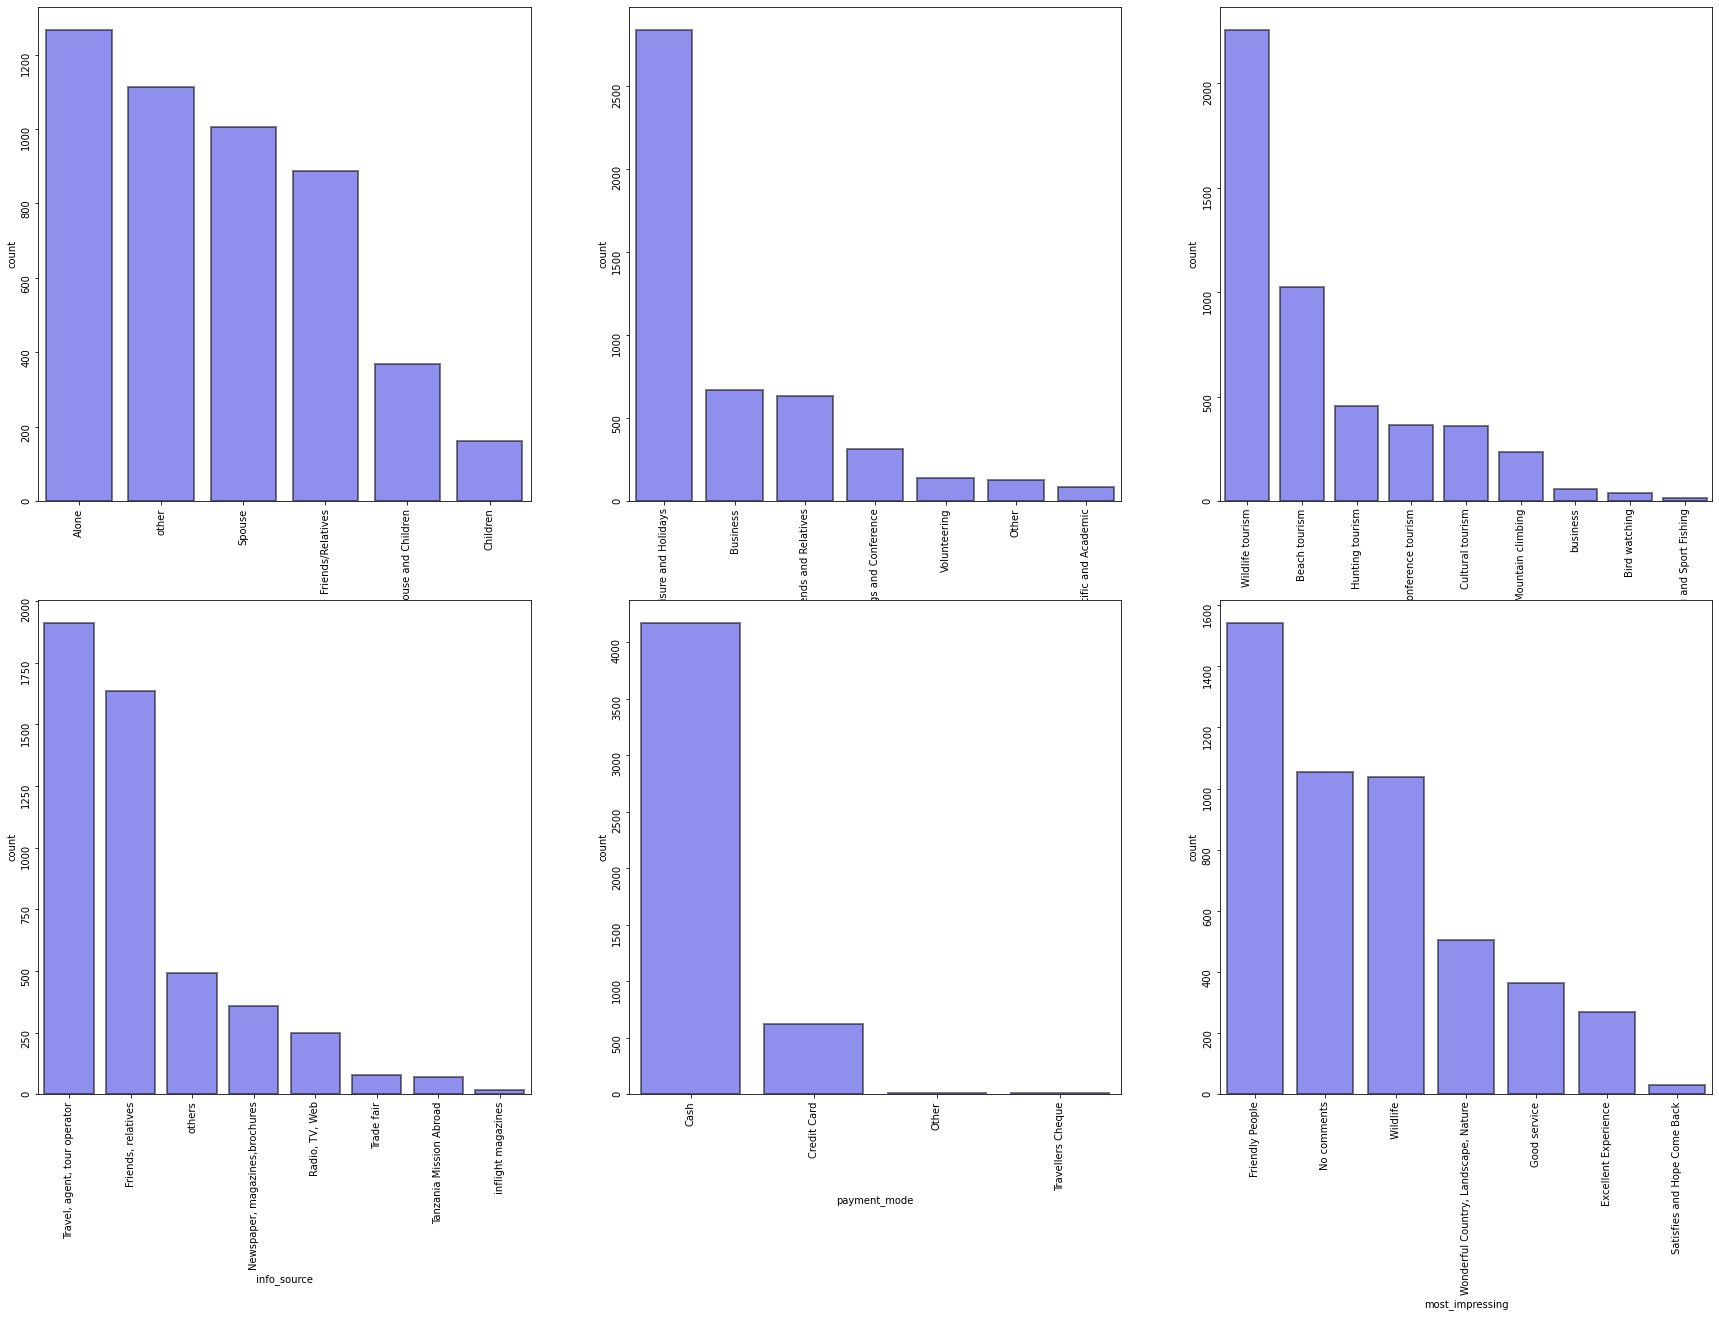

In [ ]:
visuals_1 = data[['travel_with', 'purpose', 'main_activity', 'info_source', 'payment_mode', 'most_impressing']]
fig, axes = plt.subplots(2, 3, figsize = (30,20))
for cols, ax in zip(visuals_1, axes.flatten()):
  sns.countplot(data[cols], ax = ax, order = data[cols].value_counts().index, color = 'blue', linewidth = 2, alpha = 0.5, edgecolor = 'black')
for axes in fig.axes:
  axes.tick_params(labelrotation = 90)

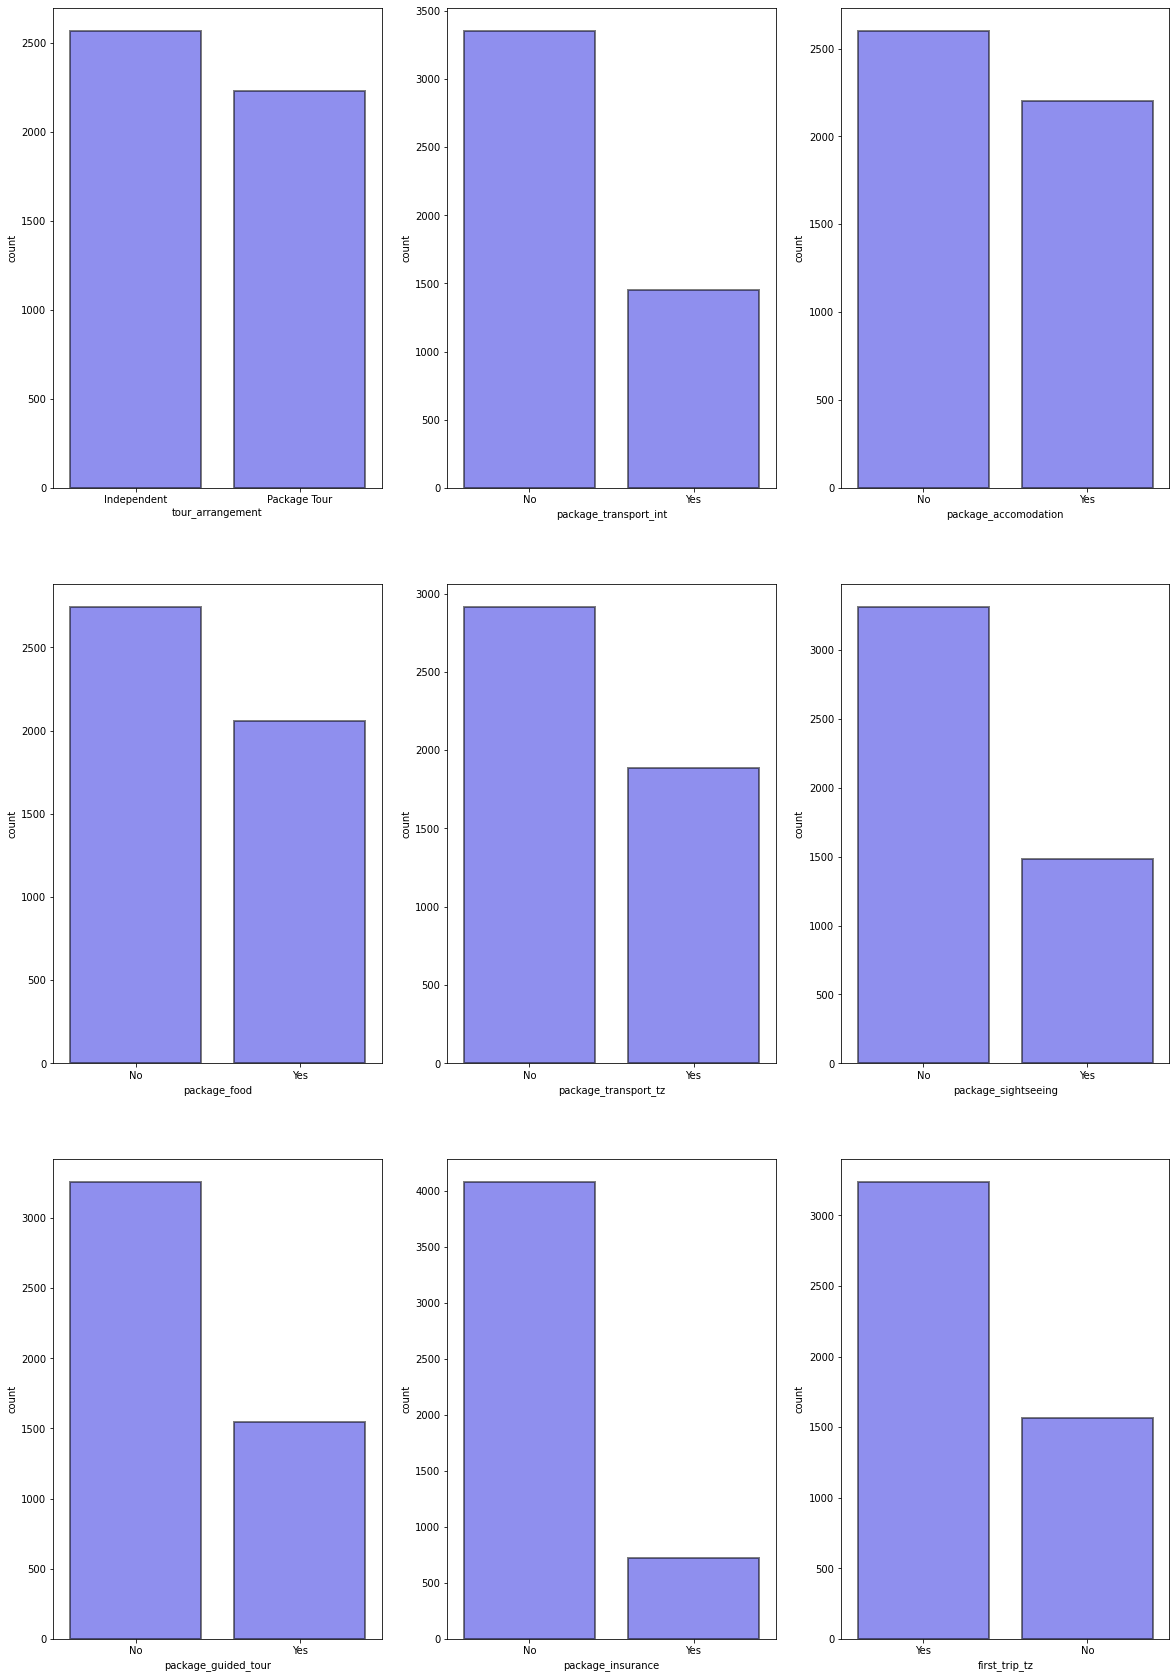

In [ ]:
visuals_2 = data[['tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'first_trip_tz']]
fig, axes = plt.subplots(3, 3, figsize = (20,30))
for cols, ax in zip(visuals_2, axes.flatten()):
  sns.countplot(data[cols], ax = ax, order = data[cols].value_counts().index, color = 'blue', linewidth = 2, edgecolor = 'black', alpha = 0.5);

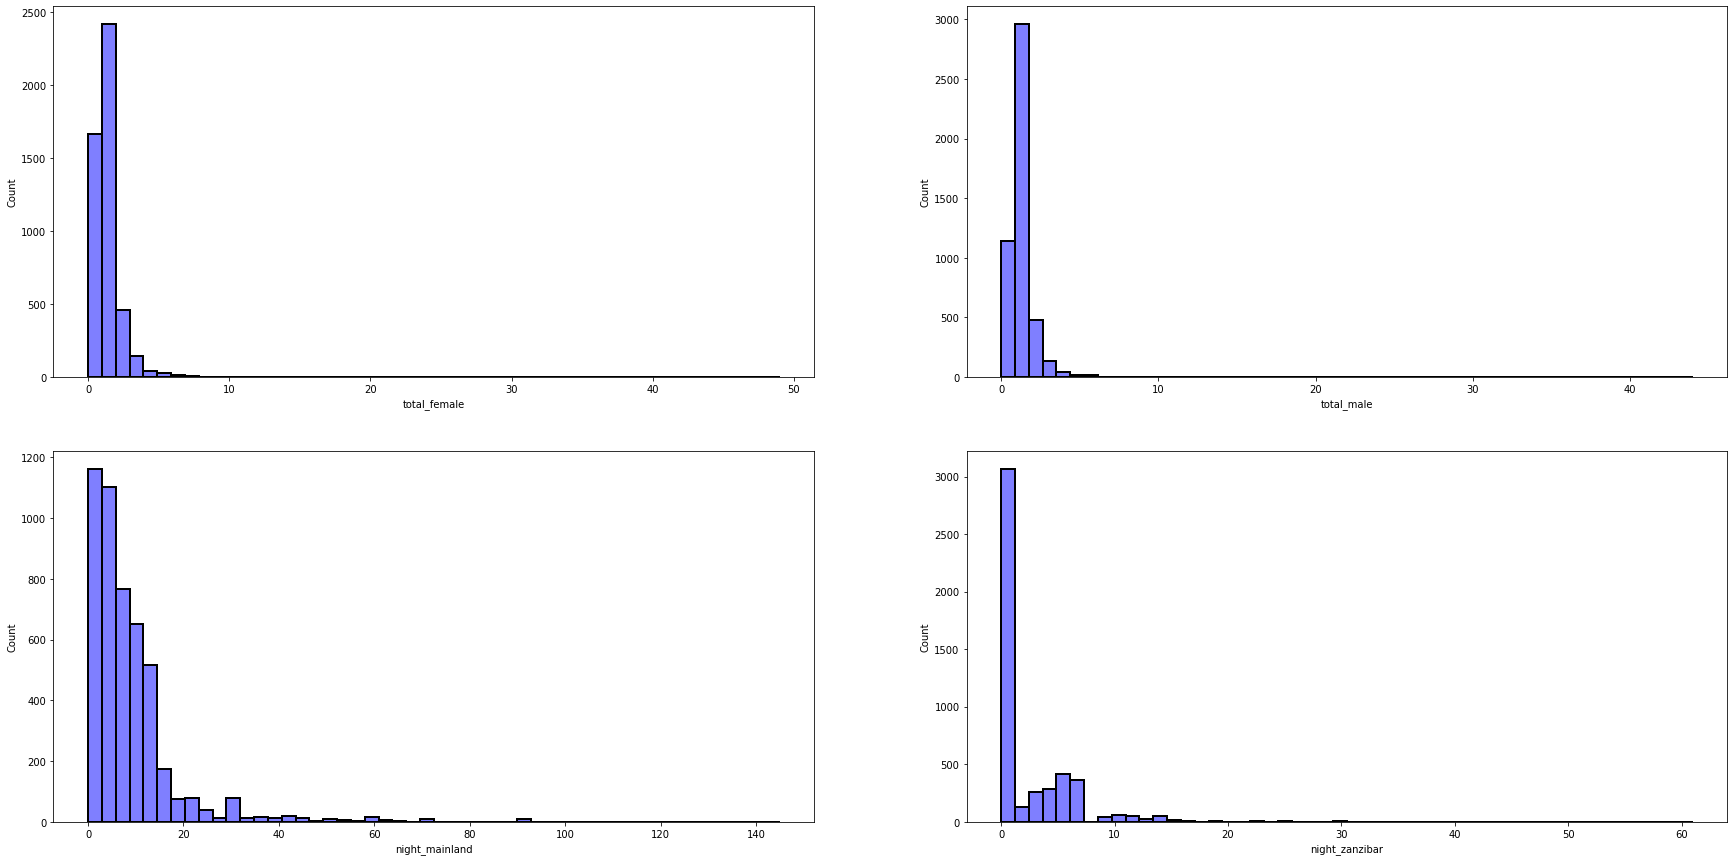

In [ ]:
visuals_3 = data[['total_female', 'total_male', 'night_mainland', 'night_zanzibar']]
fig, axes = plt.subplots(2,2, figsize = (30,15))
for cols, ax in zip(visuals_3, axes.flatten()):
  sns.histplot(data[cols], ax = ax, bins = 50, edgecolor = 'black', color = 'blue', alpha = 0.5, linewidth = 2);

**country**

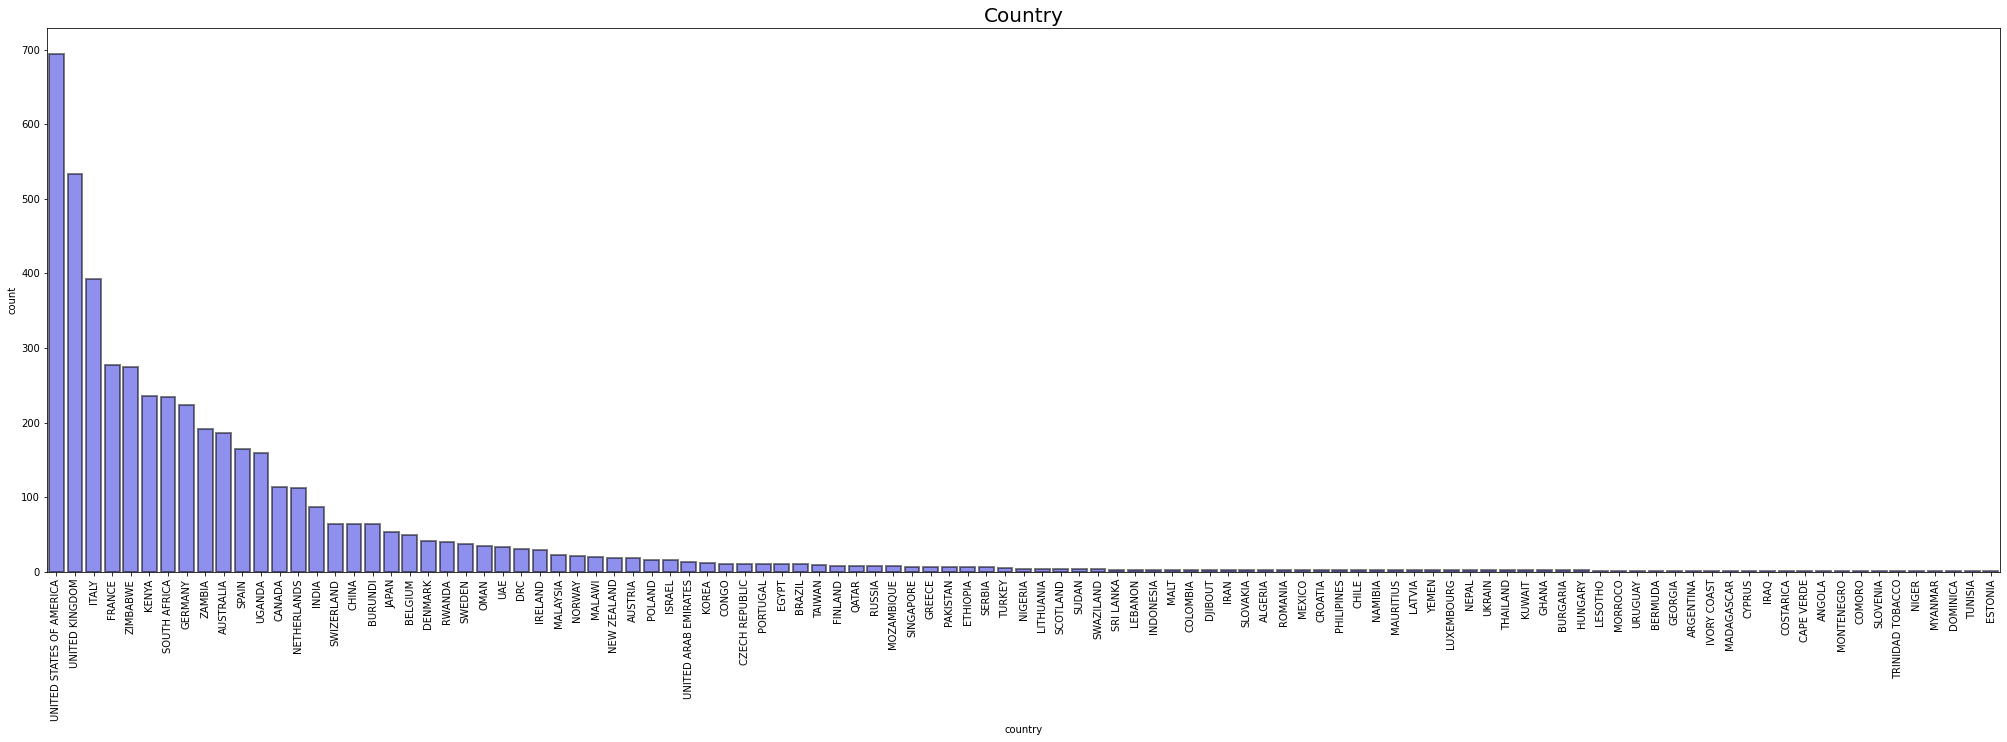

In [ ]:
fig, axes = plt.subplots(figsize = (35,10))
sns.countplot(data['country'], order = data['country'].value_counts().index, color = 'blue', alpha = 0.5, linewidth = 2, edgecolor = 'black')
plt.xticks(rotation = 90)
plt.title('Country', size = 20);

**age group**

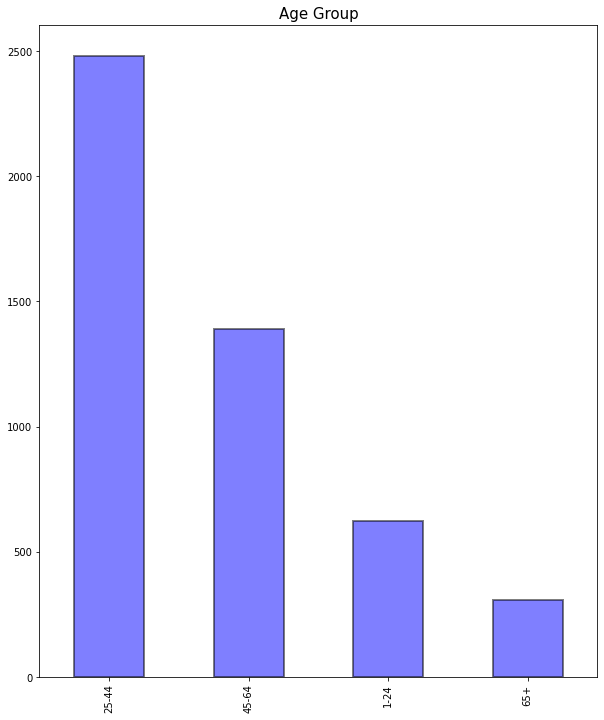

In [ ]:
fig, axes = plt.subplots(figsize = (10,12))
data['age_group'].value_counts().plot(kind = 'bar', color = 'blue', alpha = 0.5, edgecolor = 'black', linewidth = 2)
plt.title('Age Group', size = 15);

#**Bi-variate Analysis**

**label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = data.select_dtypes('object').columns
data[cols] = data[cols].apply(le.fit_transform)
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,0,89,2,2,1.0,1.0,1,7,0,0,...,0,0,0,0,13.0,0.0,0,0,2,674602.5
1,1,99,1,5,1.0,0.0,1,3,7,0,...,0,0,0,0,14.0,7.0,0,1,6,3214906.5
2,2,99,1,0,0.0,1.0,5,3,0,0,...,0,0,0,0,1.0,31.0,0,0,1,3315000.0
3,3,99,1,3,1.0,1.0,1,7,5,1,...,1,1,1,0,11.0,0.0,0,1,2,7790250.0
4,4,13,0,5,1.0,0.0,1,7,5,0,...,0,0,0,0,7.0,4.0,0,1,4,1657500.0


**heatmap**

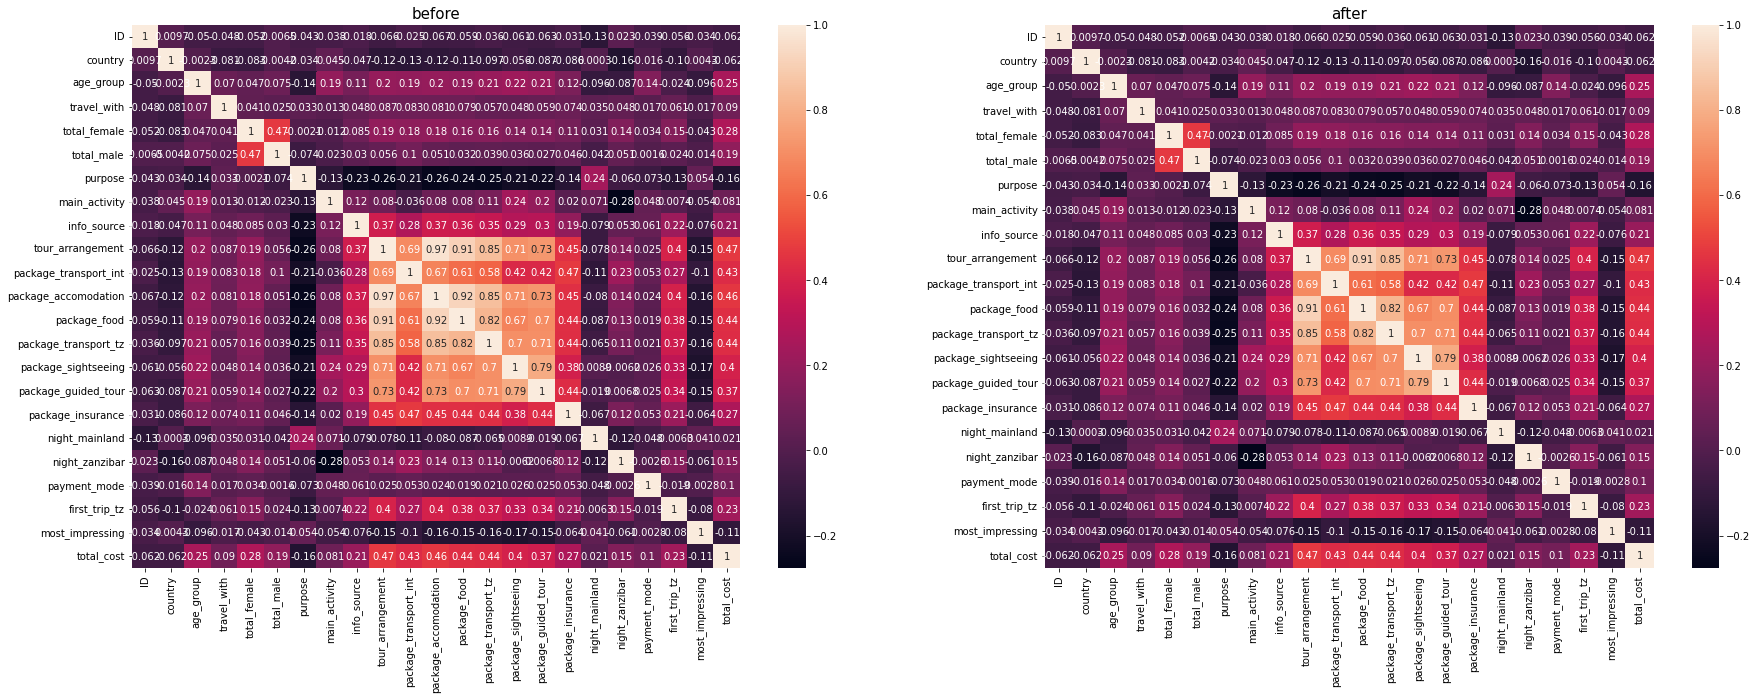

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (30, 10))
sns.heatmap(data.corr(), ax = axes[0], annot = True)
axes[0].set_title('before', size = 15);

# dropping columns with high correlation 
data = data.drop(['package_accomodation'], axis = True)

sns.heatmap(data.corr(), ax = axes[1], annot = True)
axes[1].set_title('after', size = 15);

**dropping columns with high correlation**

#**Test and Split**

**defining the variables**

In [ ]:
y = data['total_cost']
x = data.drop(['total_cost'], axis = True)

**testing and splitting**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.3)

#**Feature Importance**

In [ ]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
importance = lr.coef_
feature_importance = abs(pd.Series(lr.coef_, x.columns)).sort_values(ascending = False)

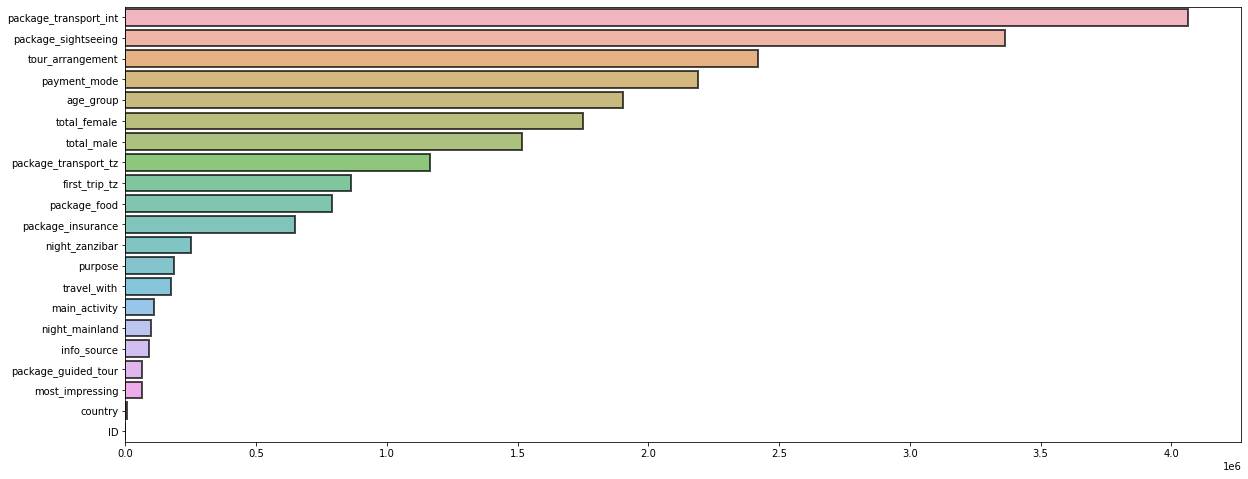

In [ ]:
fig, axes = plt.subplots(figsize = (20,8))
sns.barplot(feature_importance, feature_importance.index, linewidth = 2, edgecolor = 'black', alpha = 0.7);

In [ ]:
# selecting only the most important features (dropping the last 10 columns), to increase accuracy of the model.
data = data.drop(['night_zanzibar', 'purpose', 'travel_with', 'main_activity', 'night_mainland', 'info_source', 'package_guided_tour', 'most_impressing', 'country', 'ID'], axis = True)

#**Modelling**

**Models to use**

1. Linear Regression

2. Ridge Regression

3. Lasso Regression

**defining the data**

In [ ]:
y = data['total_cost']
x = data.drop(['total_cost'], axis = True)

**training and splitting**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.3)

**1. Linear Regression (baseline model)**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(metrics.mean_squared_error(y_test, y_pred))

97683537068659.9


**2. Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge 
rr = Ridge()
rr.fit(x_train, y_train)
y_pred = rr.predict(x_test)
print(metrics.mean_squared_error(y_test, y_pred))

97678768373562.92


**3. Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso 
lrs = Lasso()
lrs.fit(x_train, y_train)
y_pred = lrs.predict(x_test)
print(metrics.mean_squared_error(y_test, y_pred))

97683527187928.89


**Lasso Regression** has the least mean squared error which is what will be used in the prediction.

#**Test Data Prediction**

**data loading**

In [ ]:
test = pd.read_csv('Test.csv')
test.head(5)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


**test data cleaning**

In [ ]:
# checking for null values 
test.isnull().sum()

# Replacing 'travel_with' missing values with 'others'
# Replacing 'most_impressing' missing values with 'no comments'
test['travel_with'] = test['travel_with'].replace(np.NaN, 'other') 
test['most_impressing'] = test['most_impressing'].replace(np.NaN, 'No comments')

# Replacing the missing values with the mode value in the 'total_female' and 'total_male' columns.
test['total_female'].replace([np.nan], test['total_female'].mode()[0], inplace=True)
test['total_male'].replace([np.nan], test['total_male'].mode()[0], inplace=True)

In [ ]:
# Confirming there are no missing values 
test.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
dtype: int64

In [ ]:
# choosing only the most important columns 
test = test.drop(['night_zanzibar', 'purpose', 'travel_with', 'main_activity', 'night_mainland', 'info_source', 'package_guided_tour', 'most_impressing', 'country'], axis = True)

In [ ]:
test

,ID,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_insurance,payment_mode,first_trip_tz
0,tour_1,45-64,1.0,1.0,Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Cash,Yes
1,tour_100,25-44,0.0,4.0,Package Tour,Yes,Yes,No,No,No,No,Cash,No
2,tour_1001,25-44,3.0,0.0,Independent,No,No,No,No,No,No,Cash,No
3,tour_1006,24-Jan,2.0,0.0,Independent,No,No,No,No,No,No,Cash,Yes
4,tour_1009,45-64,2.0,2.0,Package Tour,Yes,Yes,Yes,Yes,No,No,Cash,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,tour_988,25-44,0.0,1.0,Independent,No,No,No,No,No,No,Cash,No
1597,tour_990,45-64,3.0,1.0,Package Tour,No,Yes,Yes,Yes,Yes,No,Other,Yes
1598,tour_992,25-44,0.0,1.0,Independent,No,No,No,No,No,No,Cash,Yes
1599,tour_996,24-Jan,0.0,1.0,Independent,No,No,No,No,No,No,Cash,Yes


**label encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
cols = test[['age_group', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_insurance', 'payment_mode', 'first_trip_tz']].columns
test[cols] = test[cols].apply(le.fit_transform)
test.head(5)

,ID,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_insurance,payment_mode,first_trip_tz
0,tour_1,2,1.0,1.0,1,1,1,1,1,1,1,0,1
1,tour_100,1,0.0,4.0,1,1,1,0,0,0,0,0,0
2,tour_1001,1,3.0,0.0,0,0,0,0,0,0,0,0,0
3,tour_1006,0,2.0,0.0,0,0,0,0,0,0,0,0,1
4,tour_1009,2,2.0,2.0,1,1,1,1,1,0,0,0,1


**prediction**

In [ ]:
y = test.drop(['ID', 'package_accomodation'], axis = True)

In [ ]:
x_train

,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_food,package_transport_tz,package_sightseeing,package_insurance,payment_mode,first_trip_tz
1000,2,1.0,1.0,1,0,1,1,1,0,0,1
1764,2,1.0,1.0,1,0,1,1,1,0,0,1
2247,1,1.0,2.0,0,0,0,0,0,0,0,1
3078,1,3.0,2.0,1,1,1,1,1,1,0,1
946,0,1.0,1.0,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1036,2,2.0,1.0,1,0,1,1,1,1,0,1
3271,1,1.0,1.0,1,0,1,1,1,0,0,1
1658,3,0.0,1.0,0,0,0,0,0,0,0,0
2614,2,2.0,0.0,0,0,0,0,0,0,0,1


In [ ]:
y

,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_food,package_transport_tz,package_sightseeing,package_insurance,payment_mode,first_trip_tz
0,2,1.0,1.0,1,1,1,1,1,1,0,1
1,1,0.0,4.0,1,1,0,0,0,0,0,0
2,1,3.0,0.0,0,0,0,0,0,0,0,0
3,0,2.0,0.0,0,0,0,0,0,0,0,1
4,2,2.0,2.0,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1596,1,0.0,1.0,0,0,0,0,0,0,0,0
1597,2,3.0,1.0,1,0,1,1,1,0,2,1
1598,1,0.0,1.0,0,0,0,0,0,0,0,1
1599,0,0.0,1.0,0,0,0,0,0,0,0,1


In [ ]:
y_pred = lrs.predict(y)

In [ ]:
prediction = pd.DataFrame(y_pred) 

In [ ]:
test['prediction'] = prediction 
test

,ID,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_insurance,payment_mode,first_trip_tz,prediction
0,tour_1,2,1.0,1.0,1,1,1,1,1,1,1,0,1,1.810376e+07
1,tour_100,1,0.0,4.0,1,1,1,0,0,0,0,0,0,1.183179e+07
2,tour_1001,1,3.0,0.0,0,0,0,0,0,0,0,0,0,4.534648e+06
3,tour_1006,0,2.0,0.0,0,0,0,0,0,0,0,0,1,2.002919e+06
4,tour_1009,2,2.0,2.0,1,1,1,1,1,0,0,0,1,1.746056e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,tour_988,1,0.0,1.0,0,0,0,0,0,0,0,0,0,3.473641e+05
1597,tour_990,2,3.0,1.0,1,0,1,1,1,1,0,2,1,2.142963e+07
1598,tour_992,1,0.0,1.0,0,0,0,0,0,0,0,0,1,1.488042e+06
1599,tour_996,0,0.0,1.0,0,0,0,0,0,0,0,0,1,-2.780700e+05


**converting to CSV**

In [ ]:
# This is the final copy
#test.to_excel(r'C:\Users\USER\Desktop\projects\Tanzania Tourism Prediction\y_pred.xlsx', index = False)